[**Demo %s**](#demo-adapt-usage)

We'll integrate the function from {numref}`Demo %s <demo-adapt-motive>`.

In [20]:
f = @(x) (x + 1).^2 .* cos((2 * x + 1) ./ (x - 4.3));

We perform the integration and show the nodes selected underneath the curve.

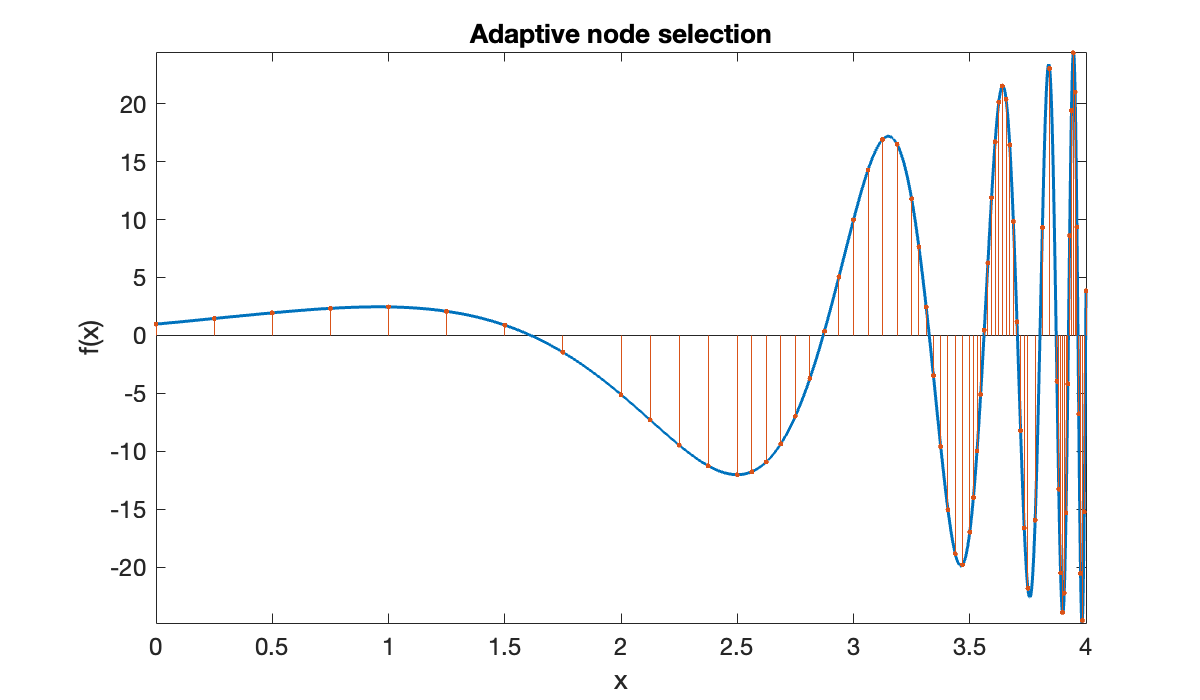

number of nodes = 69

In [21]:
[Q, t] = intadapt(f, 0, 4, 0.001);
clf, fplot(f, [0, 4], 2000)
hold on
stem(t, f(t), '.-')
title('Adaptive node selection')
xlabel('x'), ylabel('f(x)')
fprintf("number of nodes = %d", length(t))

The error turns out to be a bit more than we requested. It's only an estimate, not a guarantee.

In [22]:
I = integral(f, 0, 4, abstol=1e-14, reltol=1e-14);    % 'exact' value
fprintf("error = %.2e", abs(Q - I))

error = 2.20e-02

Let's see how the number of integrand evaluations and the error vary with the requested tolerance.

In [23]:
tol = 1 ./ 10.^(4:14)';
err = zeros(size(tol));
n = zeros(size(tol));
for i = 1:length(tol)
    [A, t] = intadapt(f, 0, 4, tol(i));
    err(i) =  I - A;
    n(i) = length(t);
end
disp(table(tol, err, n, variableNames=["tolerance", "error", "number of nodes"]))

    tolerance       error       number of nodes
    _________    ___________    _______________

     0.0001      -0.00041947           113     
      1e-05       4.7898e-05           181     
      1e-06       6.3144e-06           297     
      1e-07      -6.6392e-07           489     
      1e-08       7.1808e-08           757     
      1e-09       1.2652e-08          1193     
      1e-10      -8.4412e-10          2009     
      1e-11        2.613e-11          3157     
      1e-12       4.0449e-11          4797     
      1e-13      -1.9345e-12          7997     
      1e-14       1.6565e-13         12609     



As you can see, even though the errors are not smaller than the estimates, the two columns decrease in tandem. If we consider now the convergence not in $h$, which is poorly defined now, but in the number of nodes actually chosen, we come close to the fourth-order accuracy of the underlying Simpson scheme.

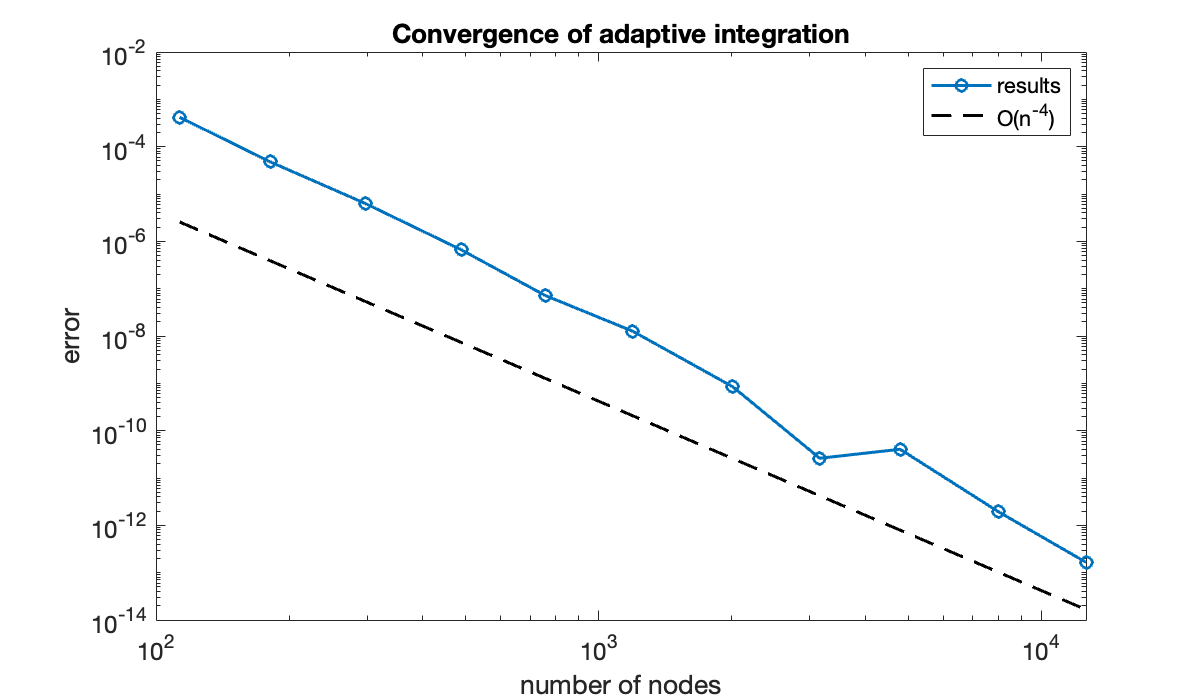

In [24]:
clf
loglog(n, abs(err), "-o", displayname="results")
xlabel("number of nodes"), ylabel("error")
title("Convergence of adaptive integration")
order4 = 0.1 * abs(err(end)) * (n / n(end)).^(-4);
hold on
loglog(n, order4, "k--", displayname="O(n^{-4})")
legend();